<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kiva-Dataset-cleaning" data-toc-modified-id="Kiva-Dataset-cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kiva Dataset cleaning</a></span><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data description</a></span><ul class="toc-item"><li><span><a href="#Kaggle-datasets" data-toc-modified-id="Kaggle-datasets-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Kaggle datasets</a></span></li><li><span><a href="#Additional-Kiva-Datasets" data-toc-modified-id="Additional-Kiva-Datasets-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Additional Kiva Datasets</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data transformation</a></span><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Gender-reclassified-and-borrower_count" data-toc-modified-id="Gender-reclassified-and-borrower_count-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Gender reclassified and borrower_count</a></span></li></ul></li><li><span><a href="#Preprocessing-step-2-(for-every-dataframe)" data-toc-modified-id="Preprocessing-step-2-(for-every-dataframe)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Preprocessing step 2 (for every dataframe)</a></span><ul class="toc-item"><li><span><a href="#MERGE-1" data-toc-modified-id="MERGE-1-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>MERGE 1</a></span><ul class="toc-item"><li><span><a href="#missing-values" data-toc-modified-id="missing-values-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>missing values</a></span></li></ul></li><li><span><a href="#THEMEREGION" data-toc-modified-id="THEMEREGION-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>THEMEREGION</a></span></li><li><span><a href="#REGLOC" data-toc-modified-id="REGLOC-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>REGLOC</a></span></li></ul></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Data transformation</a></span><ul class="toc-item"><li><span><a href="#Resampling" data-toc-modified-id="Resampling-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Resampling</a></span></li></ul></li></ul></li></ul></div>

# Kiva Dataset cleaning

<table>
  <thead>
    <tr>
      <th>Step</th>
      <th>Explanation</th>
      <th>Dataset size</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>Original dataset (without the datasets df_theme,df_regloc and df_themeregion)</td>
      <td>1,409,421</td>  
    </tr>
    <tr>
      <td>2</td>
      <td>Remove refunded/fundraising/2011/2018</td>
      <td>1,029,584</td>
    </tr>
    <tr>
      <td>3</td>
      <td>Create gender reclassified/borrower count/loan type and remove NaN gender reclassified</td>
      <td>1,003,488</td>
    </tr>
    <tr>
      <td>4</td>
      <td>Merge with df_theme</td>
      <td>744,217</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Merge with df_regloc</td>
      <td>614,010</td>
    </tr>
    <tr>
      <td>6</td>
      <td>Down-sampling of majority class</td>
      <td>69,938</td>
    </tr>
  </tbody>
</table>


## Data description

### Kaggle datasets
- <span style="color:red">df_loans</span>: dataset containing loans posted in the period 2014-2017
    * id, funded_amount, loan_amount, activity, sector, use ,country_code, country, region, currency, partner_id, posted_time, disbursed_time, funded_time, lender_count, tags, borrower_genders
    * term_in_months: number of months over which loan was scheduled to be paid back
    * repayment_interval:
        - 'irregular': repayments due along harvest or market cycles that do not align neatly with calendar-based time periods. 
        - 'monthly':
        - 'bullet': means the bulk of the repayment is due nearer to the end term date.
        - 'weekly':
    * date: date on which loan was posted → same as variable 'posted_time' so can be removed !!!
- <span style="color:red">df_theme</span>: Loan Themes are loan categories within a given partnership. For instance, a microfinance lender may have small business loans, farming loans, and health loans, all with different terms, prices, and repayment schedules, so those all count as different loan themes.
    * id: Unique ID for loan (Loan ID) 
    * Loan Theme ID: Unique ID for loan theme 
    * Loan Theme Type: General description of the loan theme category 
    * Partner ID: Unique ID for field partners  

- <span style="color:red">df_themeregion</span>
    *	Partner ID: Unique ID for field partners 
    *	Field Partner Name: Name of Field Partner 
    *	sector: Sector in which a loan is placed on Kiva's main page 
    *	Loan Theme ID: Unique ID for loan theme 
    *	Loan Theme Type: General description of the loan theme category 
    *	country: country name 
    *	forkiva: Was this loan theme created specifically for Kiva? 
    *	region: Region within country 
    *	geocode_old: Kiva's old geocoding system Lots of missing values
    *	ISO: Unique ID for country 
    *	number: Number of loans funded in this LocationName and this loan theme 
    *	amount: Dollar value of loans funded in this LocationName and this loan theme 
    *	LocationName: "{region}, {country}" - Unique ID for region 
    *	geocode: Lat-Lon pair 
    *	names: All placenames that the Gmaps API associates with LocationName 
    *	geo: Lat-Lon pair 
    *	lat: latitude 
    *	lon: longitude 
    *	mpi_region: MPI Region where we think this loan theme is located 
    *	mpi_geo: Lat-Lon pair where we think this MPI region is located 
    *	rural_pct: The percentage of this field partners' borrowers that are in rural areas

- <span style="color:red">df_regloc</span> 
    *	LocationName: "{region}, {country}" - Unique ID for region 
    *	ISO: Unique ID for country 
    *	country: country name 
    *	region: name of location within country 
    *	world_region: General global region 
    *	MPI: Multi-dimensional poverty index for this region 
    *	geo: Lat-Lon pair 
    *	lat: latitude 
    *	lon: longitude 

### Additional Kiva Datasets
- <span style="color:red">df_loans2</span>: dataset containing loans posted in the period 2006-2018
    * Status:
        - 'expired': if a loan doesn’t fully fund within 30 days of being listed on the website, it “expires.”
        - 'fundRaising': This status indicates that the loan has not yet been funded. Lenders can only lend to loans that are in the fundraising status.
        - 'funded': indicates that the loan request has been completely funded and is not available for new loans by lenders.<span style="color:red">→ Take this as target variable???</span> 
        - 'refunded': refund the funded portion of the loan to the lenders mostly because of an error (rare situation)
        
    * disburse_time: The date on which the loan was/will actually be disbursed to the borrower 
    * posted_time: Date when loan was posted on Kiva.  
    * planned_expiration_time: When the loan will expire if it is not fully funded
    * raised_time (=funded_time): When the loan became raised, e.g. fully funded. 
    * lender_term: The number of months it will take the borrower to repay the loan
    * num_journal_entries: Number of journal entries (updates on the Kiva website) by borrower.
    * num_bulk_entries:
    * repayment_interval:
        - 'irregular': repayments due along harvest or market cycles that do not align neatly with calendar-based time periods. 
        - 'monthly':
        - 'bullet': means the bulk of the repayment is due nearer to the end term date.
        - 'weekly':
    * distribution_model: How the loan is distributed to the borrower, e.g. 'field_partner' or 'direct'
- <span style="color:red">df_lenders</span>: contains information about lenders who became a member in the period 2006-2018
    * permanent_name
    * display_name
    * member_since
    * loan_because
    * num_invited: The number of registered users invited by this lender.
    * loan_purchase_num: The total number of loans made by the lender. (Niet zeker of dit klopt???)
- <span style="color:red">df_loans_lenders</span>
- <span style="color:red">df_descriptions</span> (File is 1,75GB !!!): this file contains borrower descriptions belonging to the df_loans2 dataset
    * description 
    * description_translated  
    * original_language


## Preprocessing

In [1]:
#Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
color = sns.color_palette()
#Suppress unnecessary warnings so presentation looks clean
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timezone

In [3]:
#Peter
df_theme= pd.read_csv(r"C:\Users\peter\Google Drive\ThesisMap\JupyterNotebook\Datasets\KivaDataSet\loan_theme.csv",index_col=None)
df_regloc= pd.read_csv(r"C:\Users\peter\Google Drive\ThesisMap\JupyterNotebook\Datasets\KivaDataSet\kiva_regloc.csv",index_col=None)

In [4]:
#Peter
df_loans2= pd.read_csv(r"C:\Users\peter\Documents\2e master HIR\Thesis Kiva\loans.csv",index_col=None)

In [5]:
df_loans= pd.read_csv(r"C:\Users\peter\Google Drive\ThesisMap\JupyterNotebook\Datasets\KivaDataSet\kiva_loans.csv",index_col=None)

In [12]:
len(df_loans)

671205

In [13]:
len(df_theme)

779092

In [6]:
df_theme=df_theme.rename(columns={"id": "primary_key_loan"})

## Data transformation

### Data cleaning

In [7]:
merge1=df_loans2.copy()

In [8]:
merge1.drop(merge1[ merge1['status'] == 'refunded' ].index , inplace=True)
merge1.drop(merge1[ merge1['status'] == 'fundRaising' ].index , inplace=True)

In [9]:
merge1.status.value_counts()

funded     1350340
expired      59081
Name: status, dtype: int64

In [10]:
merge1['posted_time'] = pd.to_datetime(merge1['posted_time'])
merge1['year'], merge1['month'] = merge1['posted_time'].dt.year, merge1['posted_time'].dt.month

In [11]:
# Sample of loans from 2012-2017 and only field_partner loans
merge1=merge1[(merge1['year']>=2012) & (merge1['year']<=2017) & (merge1['distribution_model']=='field_partner')]

In [12]:
len(merge1)

1029584

[Text(0, 0.5, 'Number of observations'),
 Text(0.5, 0, 'Funded (1) vs Expired (0)')]

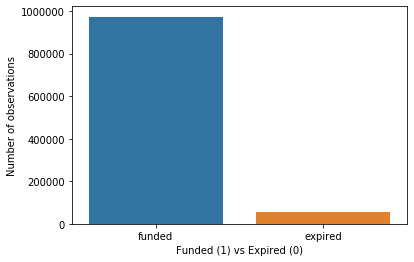

In [21]:
#histogram of target variable 
hist = sns.countplot(x='status', data=merge1)
hist.set(xlabel='Funded (1) vs Expired (0)', ylabel='Number of observations')
#hist.figure.savefig("status_imbalance.png", bbox_inches='tight')
#hist.set_title('The number of non-predisbursed loans')

In [13]:
# create column with english descriptions
merge1['description_ENG']=merge1['description_translated'].combine_first(merge1['description'])
del merge1['description']
del merge1['description_translated']

In [14]:
merge1.isnull().sum()

loan_id                                 0
loan_name                           29169
original_language                   26278
funded_amount                           0
loan_amount                             0
status                                  0
activity_name                           0
sector_name                             0
loan_use                            26287
country_code                            9
country_name                            0
town_name                           98874
currency_policy                         0
currency_exchange_coverage_rate     90812
currency                                0
partner_id                              0
posted_time                             0
planned_expiration_time              4933
disburse_time                           0
raised_time                         56591
lender_term                             0
num_lenders_total                       0
num_journal_entries                     0
num_bulk_entries                  

In [15]:
merge1['planned_expiration_time'] = pd.to_datetime(merge1['planned_expiration_time'])
merge1['disburse_time'] = pd.to_datetime(merge1['disburse_time'])
merge1['raised_time'] = pd.to_datetime(merge1['raised_time'])
merge1['funded_time'] = merge1['raised_time']

In [13]:
merge1.iloc[0,:]

loan_id                                                                       657307
loan_name                                                                       Aivy
original_language                                                            English
funded_amount                                                                    125
loan_amount                                                                      125
status                                                                        funded
activity_name                                                          General Store
sector_name                                                                   Retail
loan_use                            to buy additional inventories for her sari-sa...
country_code                                                                      PH
country_name                                                             Philippines
town_name                                                       O


### Gender reclassified and borrower_count

In [16]:
merge1['borrower_count'] = merge1['borrower_genders'].str.split().str.len()
merge1['loan_type'] = np.where(merge1['borrower_count']<= 1, 'individual', 'group')

In [17]:
merge1.loan_type.value_counts()

individual    850036
group         179548
Name: loan_type, dtype: int64

In [40]:
merge1_original = merge1.copy()

In [18]:


df = merge1[merge1['loan_type'] == 'group'].copy()
df = df[df['description_ENG'].notnull()]
df['description_ENG_Parsed'] = df['description_ENG']

# Convert to lowercase
df['description_ENG_Parsed'] = df['description_ENG_Parsed'].str.lower()

#tokenize
import nltk
from nltk.tokenize import word_tokenize
df['description_ENG_Parsed'] = df.apply(lambda row: nltk.word_tokenize(row['description_ENG_Parsed']), axis=1)
tokenized_list = df['description_ENG_Parsed'].tolist()

female_words = ['she',"she's",'her','hers','herself']
male_words = ['he',"he's",'him','his','himself']

female_count_list = []
male_count_list = []


for sentence in tokenized_list:
    female_count = 0
    male_count = 0
    for word in sentence:
        if word in male_words:
            male_count = male_count + 1
        elif word in female_words:
            female_count = female_count + 1
        else:
            continue
    male_count_list.append(male_count)
    female_count_list.append(female_count)
    
df['male counter'] = male_count_list
df['female counter'] = female_count_list
df['gender_reclassified'] = np.where(df['male counter']< df['female counter'], 'female', 'male')



In [19]:
len(df)

153267

In [41]:
merge1 = pd.merge(merge1, df[['loan_name','description_ENG','male counter','female counter','gender_reclassified']], on=['loan_name','description_ENG'], how='outer')
merge1['gender_reclassified']=merge1['gender_reclassified'].combine_first(merge1['borrower_genders'])

In [31]:
merge1.groupby(['loan_type', 'gender_reclassified']).size()

loan_type   gender_reclassified                                                                                                                                                                                                                   
group       female                                                                                                                                                                                                                                    128827
            female, female                                                                                                                                                                                                                                 1
            female, male, female, female, male                                                                                                                                                                                                             

In [35]:
merge1.isnull().sum()

loan_id                                 0
loan_name                           29169
original_language                   26278
funded_amount                           0
loan_amount                             0
status                                  0
activity_name                           0
sector_name                             0
loan_use                            26287
country_code                            9
country_name                            0
town_name                           98874
currency_policy                         0
currency_exchange_coverage_rate     90823
currency                                0
partner_id                              0
posted_time                             0
planned_expiration_time              4933
disburse_time                           0
raised_time                         56591
lender_term                             0
num_lenders_total                       0
num_journal_entries                     0
num_bulk_entries                  

## Preprocessing step 2 (for every dataframe)

### MERGE 1

 - Checking missing values/NaN of columns 
 - Check for duplicate values
 - Check for outliers
 - Correlation plots

#### missing values

In [61]:
merge1.dtypes

loan_id                                          int64
loan_name                                       object
original_language                               object
funded_amount                                  float64
loan_amount                                    float64
status                                          object
activity_name                                   object
sector_name                                     object
loan_use                                        object
country_code                                    object
country_name                                    object
town_name                                       object
currency_policy                                 object
currency_exchange_coverage_rate                float64
currency                                        object
partner_id                                     float64
posted_time                        datetime64[ns, UTC]
planned_expiration_time            datetime64[ns, UTC]
disburse_t

In [62]:
merge1.columns[merge1.isnull().any()]

Index(['loan_name', 'original_language', 'loan_use', 'country_code',
       'town_name', 'currency_exchange_coverage_rate',
       'planned_expiration_time', 'raised_time', 'tags', 'borrower_genders',
       'borrower_pictured', 'description_ENG', 'funded_time', 'borrower_count',
       'male counter', 'female counter', 'gender_reclassified'],
      dtype='object')

In [63]:
del merge1['borrower_genders']
del merge1['borrower_pictured']
del merge1['male counter']
del merge1['female counter']
del merge1['tags']

In [64]:
merge1 = merge1[merge1['gender_reclassified'].notnull()]

- original language

In [65]:
merge1.original_language.isnull().sum().sum()

0

In [66]:
merge1.original_language.unique()

array(['English', 'Spanish', 'Russian', 'French', 'Portuguese'],
      dtype=object)

In [68]:
len(merge1)

1003488

### THEMEREGION

In [69]:
df_themeregion = pd.read_csv(r"C:\Users\peter\Google Drive\ThesisMap\JupyterNotebook\Datasets\KivaDataSet\loan_themeRegion.csv",index_col=None)

### REGLOC

In [70]:
df_regloc.columns[df_regloc.isnull().any()]

Index(['LocationName', 'ISO', 'country', 'region', 'world_region', 'MPI',
       'lat', 'lon'],
      dtype='object')

In [71]:
df_regloc.shape[0]

2772

In [72]:
df_regloc.geo[2771]

'(1000.0, 1000.0)'

In [73]:
#Those values are incorrect: longitude must be in between -90 and 90

In [74]:
df_regloc = df_regloc[df_regloc.geo != '(1000.0, 1000.0)']

## Data transformation

In [75]:
df3= pd.read_csv(r"C:\Users\peter\Documents\2e master HIR\Thesis Kiva\df3.csv", index_col= None)

In [76]:
df3.dtypes

Investing_use     object
Feeding_use       object
Stock_use         object
Providing_use     object
Farming_use       object
Clothing_use      object
dominant_topic    object
status            object
loan_id            int64
dtype: object

In [77]:
len(merge1)

1003488

In [78]:
merge3 = pd.merge(merge1, df3[['dominant_topic','loan_id']], left_on='loan_id', right_on="loan_id", how='inner')

In [79]:
len(merge3)

1003479

In [80]:
merge2= merge3.copy()

In [81]:
merge2.isnull().sum()

loan_id                                0
loan_name                           2891
original_language                      0
funded_amount                          0
loan_amount                            0
status                                 0
activity_name                          0
sector_name                            0
loan_use                               0
country_code                           9
country_name                           0
town_name                          72595
currency_policy                        0
currency_exchange_coverage_rate    89176
currency                               0
partner_id                             0
posted_time                            0
planned_expiration_time             4841
disburse_time                          0
raised_time                        56588
lender_term                            0
num_lenders_total                      0
num_journal_entries                    0
num_bulk_entries                       0
repayment_interv

In [82]:
del merge2['funded_amount']
del merge2['country_code']
del merge2['lender_term']
del merge2['loan_use']
del merge2['town_name']
del merge2['planned_expiration_time']
del merge2['disburse_time']
del merge2['raised_time']
del merge2['num_lenders_total']

In [83]:
df_theme.dtypes

primary_key_loan      int64
Loan Theme ID        object
Loan Theme Type      object
Partner ID          float64
dtype: object

In [84]:
df_theme['Loan Theme Type'].isnull().sum()

14813

In [85]:
df_theme['Loan Theme ID'].isnull().sum()

14813

In [86]:
len(df_theme)

779092

In [87]:
merge3 = pd.merge(merge2, df_theme[['primary_key_loan','Loan Theme Type']], left_on='loan_id', right_on="primary_key_loan", how='inner')

In [88]:
merge3['Loan Theme Type'].isnull().sum()

0

In [89]:
df_regloc.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [90]:
len(merge3)

744217

In [91]:
df_regloc.dtypes

LocationName     object
ISO              object
country          object
region           object
world_region     object
MPI             float64
geo              object
lat             float64
lon             float64
dtype: object

In [92]:
len(df_regloc)

892

In [93]:
len(merge3)

744217

In [94]:
len(df_regloc)

892

In [95]:
df_regloc= df_regloc.groupby(['country','world_region'],as_index=False)['MPI'].mean()

In [96]:
df_regloc.head()

,country,world_region,MPI
0,Afghanistan,South Asia,0.309853
1,Bangladesh,South Asia,0.208286
2,Belize,Latin America and Caribbean,0.020143
3,Benin,Sub-Saharan Africa,0.327818
4,Bhutan,South Asia,0.123474


In [97]:
merge3.dtypes

loan_id                                          int64
loan_name                                       object
original_language                               object
loan_amount                                    float64
status                                          object
activity_name                                   object
sector_name                                     object
country_name                                    object
currency_policy                                 object
currency_exchange_coverage_rate                float64
currency                                        object
partner_id                                     float64
posted_time                        datetime64[ns, UTC]
num_journal_entries                              int64
num_bulk_entries                                 int64
repayment_interval                              object
distribution_model                              object
year                                             int64
month     

In [98]:
merge2 = pd.merge(merge3, df_regloc[['country','world_region','MPI']], left_on='country_name', right_on="country", how='inner')

In [99]:
len(merge2)

614010

In [100]:
merge2.dtypes

loan_id                                          int64
loan_name                                       object
original_language                               object
loan_amount                                    float64
status                                          object
activity_name                                   object
sector_name                                     object
country_name                                    object
currency_policy                                 object
currency_exchange_coverage_rate                float64
currency                                        object
partner_id                                     float64
posted_time                        datetime64[ns, UTC]
num_journal_entries                              int64
num_bulk_entries                                 int64
repayment_interval                              object
distribution_model                              object
year                                             int64
month     

In [101]:
del merge2['primary_key_loan']

In [102]:
merge2.dtypes

loan_id                                          int64
loan_name                                       object
original_language                               object
loan_amount                                    float64
status                                          object
activity_name                                   object
sector_name                                     object
country_name                                    object
currency_policy                                 object
currency_exchange_coverage_rate                float64
currency                                        object
partner_id                                     float64
posted_time                        datetime64[ns, UTC]
num_journal_entries                              int64
num_bulk_entries                                 int64
repayment_interval                              object
distribution_model                              object
year                                             int64
month     

In [103]:
merge2['posted_time'] = pd.to_datetime(merge2['posted_time'])
#merge2['month'] = merge2['posted_time'].dt.month

In [104]:
del merge2['posted_time']

In [105]:
merge1 = merge2.copy()

In [106]:
merge1.isnull().sum()

loan_id                                0
loan_name                           1358
original_language                      0
loan_amount                            0
status                                 0
activity_name                          0
sector_name                            0
country_name                           0
currency_policy                        0
currency_exchange_coverage_rate    17185
currency                               0
partner_id                             0
num_journal_entries                    0
num_bulk_entries                       0
repayment_interval                     0
distribution_model                     0
year                                   0
month                                  0
description_ENG                        0
funded_time                        34969
borrower_count                         0
loan_type                              0
gender_reclassified                    0
dominant_topic                         0
Loan Theme Type 

In [107]:
merge1['country_name']=merge1['country_name'].replace({"Lao People's Democratic Republic": "Lao People"})

In [108]:
merge1.dtypes

loan_id                                          int64
loan_name                                       object
original_language                               object
loan_amount                                    float64
status                                          object
activity_name                                   object
sector_name                                     object
country_name                                    object
currency_policy                                 object
currency_exchange_coverage_rate                float64
currency                                        object
partner_id                                     float64
num_journal_entries                              int64
num_bulk_entries                                 int64
repayment_interval                              object
distribution_model                              object
year                                             int64
month                                            int64
descriptio

In [109]:
del merge1['loan_name']
del merge1['currency_exchange_coverage_rate']
del merge1['num_journal_entries']
del merge1['num_bulk_entries']
del merge1['currency']
del merge1['currency_policy']

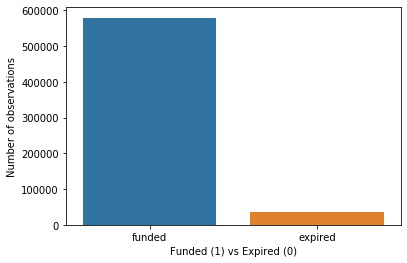

In [110]:
#histogram of target variable 
hist = sns.countplot(x='status', data=merge1)
hist.set(xlabel='Funded (1) vs Expired (0)', ylabel='Number of observations')
hist.figure.savefig("status_imbalance.png", bbox_inches='tight')
#hist.set_title('The number of non-predisbursed loans')

### Resampling

In [83]:
from sklearn.utils import resample

In [84]:
merge1.groupby('status').size()

status
expired     34969
funded     579041
dtype: int64

In [ ]:
#histogram of target variable 
hist = sns.countplot(x='status', data=merge1)
hist.set(xlabel='Funded (1) vs Expired (0)', ylabel='Number of observations')
hist.figure.savefig("status_imbalance.png", bbox_inches='tight')
#hist.set_title('The number of non-predisbursed loans')

In [85]:
df_majority = merge1[merge1.status=='funded']
df_minority = merge1[merge1.status=='expired']

In [86]:
len(df_minority)

34969

In [87]:
from sklearn.utils import resample

In [89]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=34969,     # to match minority class
                                 random_state=42) # reproducible results

In [90]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [91]:
merge1 =df_downsampled.copy()

In [92]:
merge1.dtypes

loan_id                  int64
original_language       object
loan_amount            float64
status                  object
activity_name           object
sector_name             object
country_name            object
partner_id             float64
repayment_interval      object
distribution_model      object
year                     int64
month                    int64
description_ENG         object
borrower_count         float64
loan_type               object
gender_reclassified     object
dominant_topic          object
Loan Theme Type         object
country                 object
world_region            object
MPI                    float64
dtype: object

In [93]:
len(merge1)

69938

In [94]:
merge1.isnull().sum()

loan_id                0
original_language      0
loan_amount            0
status                 0
activity_name          0
sector_name            0
country_name           0
partner_id             0
repayment_interval     0
distribution_model     0
year                   0
month                  0
description_ENG        0
borrower_count         0
loan_type              0
gender_reclassified    0
dominant_topic         0
Loan Theme Type        0
country                0
world_region           0
MPI                    0
dtype: int64

In [95]:
merge_sample = merge1.copy()

In [96]:
merge1.dtypes

loan_id                  int64
original_language       object
loan_amount            float64
status                  object
activity_name           object
sector_name             object
country_name            object
partner_id             float64
repayment_interval      object
distribution_model      object
year                     int64
month                    int64
description_ENG         object
borrower_count         float64
loan_type               object
gender_reclassified     object
dominant_topic          object
Loan Theme Type         object
country                 object
world_region            object
MPI                    float64
dtype: object

In [97]:
merge1.corr()

,loan_id,loan_amount,partner_id,year,month,borrower_count,MPI
loan_id,1.000000,-0.028917,0.180592,0.965470,0.193233,0.034209,0.060967
loan_amount,-0.028917,1.000000,0.007559,-0.032174,0.004906,0.457816,0.082086
partner_id,0.180592,0.007559,1.000000,0.181241,0.017442,0.065519,0.265343
year,0.965470,-0.032174,0.181241,1.000000,-0.060780,0.051689,0.061866
month,0.193233,0.004906,0.017442,-0.060780,1.000000,-0.055024,0.001172
borrower_count,0.034209,0.457816,0.065519,0.051689,-0.055024,1.000000,0.261210
MPI,0.060967,0.082086,0.265343,0.061866,0.001172,0.261210,1.000000


In [98]:
#No strong correlations

In [99]:
merge1.MPI.min()

0.006333333333333333

In [100]:
merge1.MPI = merge1.MPI.round(decimals=2)

In [101]:
merge1.dtypes

loan_id                  int64
original_language       object
loan_amount            float64
status                  object
activity_name           object
sector_name             object
country_name            object
partner_id             float64
repayment_interval      object
distribution_model      object
year                     int64
month                    int64
description_ENG         object
borrower_count         float64
loan_type               object
gender_reclassified     object
dominant_topic          object
Loan Theme Type         object
country                 object
world_region            object
MPI                    float64
dtype: object

In [102]:
del merge1['country']

In [103]:
merge1.dominant_topic.value_counts()

Stock_use        16233
Farming_use      15355
Clothing_use     12797
Investing_use    10931
Feeding_use       9648
Providing_use     4974
Name: dominant_topic, dtype: int64

In [104]:
#merge1['month']=merge1['month'].astype('category')

In [105]:
#merge1.month.value_counts()

In [106]:
merge1.dtypes

loan_id                  int64
original_language       object
loan_amount            float64
status                  object
activity_name           object
sector_name             object
country_name            object
partner_id             float64
repayment_interval      object
distribution_model      object
year                     int64
month                    int64
description_ENG         object
borrower_count         float64
loan_type               object
gender_reclassified     object
dominant_topic          object
Loan Theme Type         object
world_region            object
MPI                    float64
dtype: object

In [107]:
lijst = merge1.partner_id.to_list()

In [108]:
setje = set(lijst)

In [109]:
print(setje)

{9.0, 521.0, 528.0, 533.0, 23.0, 537.0, 538.0, 544.0, 550.0, 551.0, 40.0, 42.0, 44.0, 55.0, 57.0, 61.0, 62.0, 63.0, 65.0, 71.0, 74.0, 78.0, 81.0, 82.0, 93.0, 96.0, 97.0, 98.0, 100.0, 104.0, 105.0, 106.0, 108.0, 111.0, 112.0, 116.0, 117.0, 118.0, 119.0, 120.0, 123.0, 125.0, 126.0, 129.0, 133.0, 136.0, 137.0, 138.0, 139.0, 143.0, 144.0, 145.0, 148.0, 154.0, 156.0, 159.0, 161.0, 162.0, 163.0, 164.0, 166.0, 167.0, 176.0, 177.0, 182.0, 183.0, 184.0, 185.0, 187.0, 188.0, 190.0, 199.0, 201.0, 202.0, 204.0, 205.0, 210.0, 213.0, 215.0, 216.0, 217.0, 218.0, 219.0, 222.0, 225.0, 226.0, 231.0, 243.0, 244.0, 245.0, 246.0, 247.0, 253.0, 257.0, 258.0, 259.0, 260.0, 261.0, 262.0, 263.0, 269.0, 271.0, 273.0, 279.0, 281.0, 282.0, 287.0, 288.0, 290.0, 292.0, 295.0, 296.0, 298.0, 300.0, 302.0, 304.0, 305.0, 310.0, 311.0, 313.0, 317.0, 319.0, 321.0, 322.0, 324.0, 328.0, 329.0, 330.0, 333.0, 337.0, 340.0, 346.0, 351.0, 356.0, 358.0, 359.0, 361.0, 364.0, 365.0, 366.0, 367.0, 369.0, 380.0, 381.0, 384.0, 386.0

In [110]:
set2= set()

In [111]:
for i in setje:
    set2.add(int(i))

In [112]:
print(set2)

{9, 521, 528, 533, 23, 537, 538, 544, 550, 551, 40, 42, 44, 55, 57, 61, 62, 63, 65, 71, 74, 78, 81, 82, 93, 96, 97, 98, 100, 104, 105, 106, 108, 111, 112, 116, 117, 118, 119, 120, 123, 125, 126, 129, 133, 136, 137, 138, 139, 143, 144, 145, 148, 154, 156, 159, 161, 162, 163, 164, 166, 167, 176, 177, 182, 183, 184, 185, 187, 188, 190, 199, 201, 202, 204, 205, 210, 213, 215, 216, 217, 218, 219, 222, 225, 226, 231, 243, 244, 245, 246, 247, 253, 257, 258, 259, 260, 261, 262, 263, 269, 271, 273, 279, 281, 282, 287, 288, 290, 292, 295, 296, 298, 300, 302, 304, 305, 310, 311, 313, 317, 319, 321, 322, 324, 328, 329, 330, 333, 337, 340, 346, 351, 356, 358, 359, 361, 364, 365, 366, 367, 369, 380, 381, 384, 386, 388, 389, 390, 392, 393, 397, 398, 406, 407, 412, 415, 417, 418, 422, 423, 429, 432, 433, 435, 436, 438, 439, 440, 441, 442, 443, 444, 446, 448, 449, 451, 452, 455, 456, 457, 458, 464, 465, 466, 468, 469, 473, 480, 483, 484, 489, 493, 499, 502, 504, 507}


In [113]:
merge1.to_csv(r"C:\Users\peter\Documents\2e master HIR\Thesis Kiva\merge1_final_corrected.csv", index=False)

In [114]:
merge1.groupby(['loan_type', 'gender_reclassified']).size()

loan_type   gender_reclassified
group       female                  6696
            male                    2726
individual  female                 38307
            male                   22209
dtype: int64